<a href="https://colab.research.google.com/github/AlbinB/Text-Analytics-NLP/blob/main/1_2_3_Vectorizing%2BText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes

<h2>Text as Numbers</h2>

**We need to convert text into numeric representations to translate language for machines.**

So this gives us a representation of digital texts that looks a bit like human language. Now we need to make that into something that a machine can read. Remember that idea of linguistic space we mentioned? It’s a metaphor that says every text exists in a particular location. Imagine I have a stack of alphabet blocks: I can measure how close “A” is to “F”. I can measure whether “A” is closer to “F” than “G” is. That is exactly what we want to do for words and texts.

But our stack of documents is enormous, unlike our stack of alphabet blocks. Our data set of hotel reviews contains 620 million words, with a vocabulary of 661,000 unique words. This is a lot of distances to measure out. So we move into a high-dimensional space. Humans exist in just 4 dimensions. Text analytics here could use over 100k dimensions. Let’s see what this looks like.

<br>

1. My neighbor sang a song about tulips.

2. My neighbor sang a song about my neighbor.

3. My neighbor sang a song about my tulips.


Here we have three sentences. Our first step is make a vocabulary like a table, where each word is a column (up and down) and each sentence is a row (left to right). The vocabulary looks like this when we go in alphabetic order:




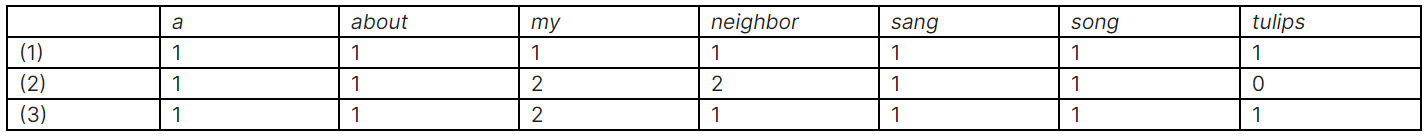

So now I just count how many times each word occurs in each sentence. This is frequency. Again, words are columns and sentences are rows. The first sentence has the word neighbor just one time; but the second sentence has it twice. So we write out all the word frequencies.

This gives us a **frequency vector**. The reason these vectors make sense to a machine is that we can measure the distance between them. We can compare vectors. Sentence (2) is about half-way between sentence (1) and sentence (3). You’re thinking, this seems pretty trivial. But in text analytics we work with 20k or 50k or 100k dimensions. When this linguistic space gets really big, our distance measures get really good. But the basic idea to remember here is that this let’s us write every possible sentence in a single form before we feed it into the machine

# Colab Setup

In [1]:
# if you are running these labs in CoLab, you will first need to mount the drive and 
# copy text_analitics.py to path 

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
###Add text_analytics.py to path 
!cp "/content/drive/My Drive/Colab Notebooks/CourseWork/Text Analytics and Natural Language Processing/text_analytics.py" .
print("Done!")

Done!


# Lecture Lab

In this lab, we'll be looking at how to turn a text into numbers. A numeric representation like this is called a *vector*. And so the process of turning language into numbers is called vectorizing. We'll start, as always, by loading our environment.

In [3]:
from text_analytics import text_analytics
from sklearn.feature_extraction.text import CountVectorizer
import os
import pandas as pd

ai = text_analytics()
print("Done!")

Done!


We'll work with articles about corruption, like last time.

In [25]:
file = "NYT.Corruption.gz"
file =  os.path.join(ai.data_dir, file)
df = pd.read_csv(file, index_col = 0)
print(df)
print("Done!")

         Country       Class                                               Text
0      Argentina       Other  Secretary of State Madeleine Albright, visitin...
1      Argentina  Corruption  Argentine Pres Fernando de la Rua denies recen...
2      Argentina       Other  British Telecommunications PLC plans to invest...
3      Argentina       Other  Shareholders clear $650 million rescue package...
4      Argentina       Other  United States International Trade Commission r...
...          ...         ...                                                ...
19310  Venezuela       Other  Representative Ilhan Omar, a Minnesota Democra...
19311  Venezuela       Other  Secretary of State Mike Pompeo made his first ...
19312  Venezuela       Other  President Nicolás Maduro has long enjoyed the ...
19313  Venezuela       Other  Secretary of State Mike Pompeo discussed diffe...
19314  Venezuela       Other  Juan Guaidó, the Venezuelan opposition leader,...

[19315 rows x 3 columns]
Done!


So, here we are going to run some code to initialize the vectorizer. We're using one from *scikit-learn*. And initializing means that we're creating the class, before we use it.

In [26]:
vectorizer = CountVectorizer(
    input = "content", 
    preprocessor = ai.clean_pre,
    analyzer = "word",
    )

print("Done!")

Done!


Now, we'll go ahead and use it.

In [27]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
print(vector)
print("Done!")

['The Times’s Marcus Mabry and Lydia Polgreen in Pretoria, South Africa, report on developments in the Oscar Pistorius case.']
  (0, 15)	2
  (0, 16)	1
  (0, 7)	1
  (0, 6)	1
  (0, 1)	1
  (0, 5)	1
  (0, 11)	1
  (0, 4)	2
  (0, 12)	1
  (0, 14)	1
  (0, 0)	1
  (0, 13)	1
  (0, 8)	1
  (0, 3)	1
  (0, 9)	1
  (0, 10)	1
  (0, 2)	1
Done!


So, the first thing we've displayed is the string. And the second thing we've displayed is the vectorized or numeric version of that string.

This is currently in a *sparse* format, so that not every element has to be displayed. We'll show the full version, though.

In [29]:
#line = ai.print_sample(df)
print(line)
vector = vectorizer.fit_transform([line]).todense()
print(vector)
print("Done!")

The Times’s Marcus Mabry and Lydia Polgreen in Pretoria, South Africa, report on developments in the Oscar Pistorius case.
[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1]]
Done!


Let's finish up by making this into a nice dataframe.

In [30]:
#line = ai.print_sample(df)
print(line)
vector = vectorizer.fit_transform([line])
vector = ai.print_vector(vector, vectorizer)
print(vector)
print("Done!")

The Times’s Marcus Mabry and Lydia Polgreen in Pretoria, South Africa, report on developments in the Oscar Pistorius case.
              0
africa        1
and           1
case          1
developments  1
in            2
lydia         1
mabry         1
marcus        1
on            1
oscar         1
pistorius     1
polgreen      1
pretoria      1
report        1
south         1
the           2
times         1
Done!


Some of this code is a bit dense, but try out a few sentences. The point is that this transforms each sentence in a list of numbers. And tells us what each number in that vector corresponds to. So, in this lab we've taken a first look at how to vectorize our texts.

Try it out yourself: use the code block below to make some vectors from this file:
    
    "Gutenberg.1850.Authors.gz"

In [36]:
file = "Gutenberg.1850.Authors.gz"
file =  os.path.join(ai.data_dir, file)
df = pd.read_csv(file, index_col = 0)
print(df)

        index  ...                                               Text
0         150  ...  note project gutenberg also has an html versio...
1         151  ...  it will be recollected to epirus where her fri...
2         152  ...  it would be best to endeavor to effect a landi...
3         153  ...  transport his army across the straits the army...
4         154  ...  that the true greatness of the soul of alexand...
...       ...  ...                                                ...
17042  125483  ...  since i have been with amabel it hath waxed st...
17043  125484  ...  his face uttered a loud cry and shrank back af...
17044  125485  ...  the taurus mountains made the afternoon balmy ...
17045  125486  ...  me to a place not very far distant where all m...
17046  125487  ...  never knew these things before now thou dost r...

[15999 rows x 5 columns]


In [32]:
#will reinstantiate vectorizer to reset the count

vectorizer = CountVectorizer(
    input = "content", 
    preprocessor = ai.clean_pre,
    analyzer = "word",
    )

print("Done!")

Done!


In [33]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
print(vector)
print("Done!")

['particular let us respect whatever professor saintsbury writes who has done such splendid work upon english i daresay he would retort upon my impatience grandly enough quoting walt whitman i am the teacher of athletes he that by me spreads a wider breast than my own proves the width of my own he most honours my style who learns under it to destroy the teacher his speculations may lead to much in time though for the present they yield us small instruction in the path we seek it is time we harked back to our own verse is written in metre and strict rhythm prose without metre and with the freest possible rhythm that distinction seems simple enough but it carries consequences very far from simple let me give you an illustration taken almost at hazard from milton from the second book of paradise regained up to a hill anon his steps he reared from whose high top to ken the prospect round if cottage were in view or herd but cottage herd or none he saw these few lines are verse are obviously

In [34]:
#line = ai.print_sample(df)
print(line)
vector = vectorizer.fit_transform([line]).todense()
print(vector)
print("Done!")

particular let us respect whatever professor saintsbury writes who has done such splendid work upon english i daresay he would retort upon my impatience grandly enough quoting walt whitman i am the teacher of athletes he that by me spreads a wider breast than my own proves the width of my own he most honours my style who learns under it to destroy the teacher his speculations may lead to much in time though for the present they yield us small instruction in the path we seek it is time we harked back to our own verse is written in metre and strict rhythm prose without metre and with the freest possible rhythm that distinction seems simple enough but it carries consequences very far from simple let me give you an illustration taken almost at hazard from milton from the second book of paradise regained up to a hill anon his steps he reared from whose high top to ken the prospect round if cottage were in view or herd but cottage herd or none he saw these few lines are verse are obviously v

In [35]:
#line = ai.print_sample(df)
print(line)
vector = vectorizer.fit_transform([line])
vector = ai.print_vector(vector, vectorizer)
print(vector)
print("Done!")

particular let us respect whatever professor saintsbury writes who has done such splendid work upon english i daresay he would retort upon my impatience grandly enough quoting walt whitman i am the teacher of athletes he that by me spreads a wider breast than my own proves the width of my own he most honours my style who learns under it to destroy the teacher his speculations may lead to much in time though for the present they yield us small instruction in the path we seek it is time we harked back to our own verse is written in metre and strict rhythm prose without metre and with the freest possible rhythm that distinction seems simple enough but it carries consequences very far from simple let me give you an illustration taken almost at hazard from milton from the second book of paradise regained up to a hill anon his steps he reared from whose high top to ken the prospect round if cottage were in view or herd but cottage herd or none he saw these few lines are verse are obviously v